<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off - Khoản vay có được trả hết hay không ? </font></h1>
<h2 align="center"><font size="5">From 13h30 To 17h30 - 25/07/2021</font></h2>
<h3 align="center"><font size="5"> Total marks: 3.0</font></h3>

### Your information:
- Fullname: Lê Minh Hiếu
- Date of birth: 01/05/1992
- Place of birth: Gioson-Giolinh-Quangtri
- Email: hieulmsc@gmail.com
- Mobile phone: 0947841045

In this notebook, we practice all the knowledge and skills that we learned in this course (LDS5: Data pre-processing and analysis)

We apply the **Logistic Regression Algorithm** to predict: **"Whether a loan is paid off on in collection"** by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import chi2_contingency, chi2
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas_profiling as pp # tổng quan ban đầu về dữ liệu => Cài trên này
from PIL import Image

### About dataset

This dataset is about past loans. The __loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 

### Load Data From CSV File  

In [2]:
# Read CSV file: loan_train.csv
# code here
df = pd.read_csv('data/loan_train.csv')
df = df[['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
         'age', 'Gender', 'education']]

In [3]:
# Understanding to dataset
# shape
# info
# head(), tail()
# describe()

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   Gender          346 non-null    object
 7   education       346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


In [5]:
# shape
df.shape

(346, 8)

In [6]:
# head
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,male,High School or Below
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,female,Bechalor
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,male,college
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,female,college
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,male,college


In [7]:
# tail
df.tail()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,male,High School or Below
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,male,High School or Below
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,male,college
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,male,college
345,COLLECTION,1000,30,9/12/2016,10/11/2016,26,male,college


In [8]:
# describe
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [9]:
# Thư viện xem tổng quan về dữ liệu
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Nhận xét:
   1. Có 6 biến categorical và 2 biến liên tục = tổng là 8 biến
        - lst_categorical = ['loan_status','terms','effective_date','due_date', 'education','Gender']
        - lst_countinuos = ['Principal','age']
   2. Dữ liệu có 346 dòng, 40 dòng trùng nhau chiếm 11.6%
   3. 3 Biến: ['terms','effective_date','due_date'] => tương quan với nhau quá nhiều
   4. Tổng quan về từng biến:
        - Loan_status (categorical): Faidoff: Trả hết/ Collection: Thu thập <=> 260/75.1% và 86/24.9%
        - Principal (continuous): phân phối lệch phải và dẹt, variable và str chêch lệch lớn
        - Terms (Categorical): 30 ngày/15 ngày/ 7 ngày <=> 184/53.2%-148/42.8%-14/4%
        - effettive_date (categorical):  Xem lại ngày
        - due_date (categorical): Xem lại ngày
        - age (continuous): Xem lại thuộc tính này là categorical hay là continuos
        - Gender (Categorical): Khách hàng chủ yếu khoản vay là nam chiếm tỉ lệ 85%
        - education(Categorical): Tỉ lệ chiếm chủ yếu là dưới bậc đại học là đa số

In [10]:
# see values
for i in df.columns:
    print('\033[4m'+'Kiểm tra biến', i +'\033[0m', ': ', len(df[i].unique()), 'giá trị,', 
          df[i].sort_values().unique(), ', dtype:', df[i].dtypes)

Kiểm tra biến loan_status :  2 giá trị, ['COLLECTION' 'PAIDOFF'] , dtype: object
Kiểm tra biến Principal :  5 giá trị, [ 300  500  800  900 1000] , dtype: int64
Kiểm tra biến terms :  3 giá trị, [ 7 15 30] , dtype: int64
Kiểm tra biến effective_date :  7 giá trị, ['9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016' '9/14/2016' '9/8/2016'
 '9/9/2016'] , dtype: object
Kiểm tra biến due_date :  23 giá trị, ['10/10/2016' '10/11/2016' '10/12/2016' '10/13/2016' '10/25/2016'
 '10/26/2016' '10/7/2016' '10/8/2016' '10/9/2016' '11/10/2016'
 '11/12/2016' '11/9/2016' '9/16/2016' '9/17/2016' '9/18/2016' '9/19/2016'
 '9/22/2016' '9/23/2016' '9/24/2016' '9/25/2016' '9/26/2016' '9/27/2016'
 '9/28/2016'] , dtype: object
Kiểm tra biến age :  32 giá trị, [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 50 51] , dtype: int64
Kiểm tra biến Gender :  2 giá trị, ['female' 'male'] , dtype: object
Kiểm tra biến education :  4 giá trị, ['Bechalor' 'High School or Below' 'M

#### Nhận xét:
    - Không có giá trị mssing value

# KHÁM PHÁ DỮ LIỆU

##### Identify Variables
##### Univariate Analysis
##### Bi-variate Analysis
##### Handle the Missing Values
##### Handle Outlier Values

### 1. Identify Variables

In [11]:
## Input - Output
# Theo yêu càu bài toán xác định được: "Khoản vay có được trả hết hay không ?" 
# Output: loan)status
# Input: là biến còn lại
lst_output = ['loan_status']
lst_input = ['Principal', 'terms', 'effective_date', 'due_date',
         'age', 'Gender', 'education']

In [12]:
## Output - Category
df[lst_output].dtypes

loan_status    object
dtype: object

In [13]:
## Input - Number
print('Thuộc tính kiểu số:', df[lst_input].select_dtypes(include=['int64','float']).columns)

Thuộc tính kiểu số: Index(['Principal', 'terms', 'age'], dtype='object')


In [14]:
## Input - Object
print('Thuộc tính kiểu chuỗi:', df[lst_input].select_dtypes(include=['object']).columns)

Thuộc tính kiểu chuỗi: Index(['effective_date', 'due_date', 'Gender', 'education'], dtype='object')


In [15]:
## Input - Category
lst_in_cate_str = []
lst_in_cate_num = []
lst_in_cate = []

for i in lst_input:    
    if df[i].dtypes =='object':
        lst_in_cate.append(i)
#         i = '\'' + i + '\''
        lst_in_cate_str.append(i)
    elif len(df[i].unique()) <= 30 and (df[i].dtypes =='int64' or df[i].dtypes =='float'):
        lst_in_cate.append(i)
#         i = '\'' + i + '\''
        lst_in_cate_num.append(i)   
    else: pass    
print('- Thuộc tính phân loại kiểu chuỗi: ',', '.join(lst_in_cate_str))
print('- Thuộc tính phân loại kiểu số: ',', '.join(lst_in_cate_num))

- Thuộc tính phân loại kiểu chuỗi:  effective_date, due_date, Gender, education
- Thuộc tính phân loại kiểu số:  Principal, terms


In [16]:
## Input - Continious
lst_in_cont = list(set(lst_input) - set(lst_in_cate))

t3 = []
for i in lst_in_cont:
#     i = '\'' + i + '\''
    t3.append(i)   
print('- Thuộc tính liên tục:',', '.join(t3))

- Thuộc tính liên tục: age


# Nhận xét:
   1. Ta thấy 1 điều là có những thuộc tính nó sắp sếp vào categorical những thực tế nó là liên tục
   2. Dùng công thực chạy những phải xem lại tính chất của thuộc tính thế nào vào sắp sếp lại các thuộc tính sao cho phù hợp và bằng tay

In [17]:
# Sắp xếp lại bằng tay dự trên tính chất của thuộc tính
lst_categorical = ['loan_status','terms','effective_date','due_date', 'education','Gender']
lst_countinuos = ['Principal','age']

In [18]:
# Chuyển kiểu dữ liệu
df[lst_countinuos] = df[lst_countinuos].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_status     346 non-null    object 
 1   Principal       346 non-null    float64
 2   terms           346 non-null    int64  
 3   effective_date  346 non-null    object 
 4   due_date        346 non-null    object 
 5   age             346 non-null    float64
 6   Gender          346 non-null    object 
 7   education       346 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 21.8+ KB


### 2. Univariate Analysis

In [19]:
## Continious - describe
print(df[lst_countinuos].describe())
for i in range(len(lst_countinuos)):
    print("\nGiá trị thống kê của", (lst_countinuos)[i],":\n",stats.describe(df[(lst_countinuos)[i]]))

         Principal         age
count   346.000000  346.000000
mean    943.641618   30.939306
std     109.425530    6.039418
min     300.000000   18.000000
25%     900.000000   27.000000
50%    1000.000000   30.000000
75%    1000.000000   35.000000
max    1000.000000   51.000000

Giá trị thống kê của Principal :
 DescribeResult(nobs=346, minmax=(300.0, 1000.0), mean=943.6416184971098, variance=11973.946552735193, skewness=-2.5889493710967826, kurtosis=9.76192539327609)

Giá trị thống kê của age :
 DescribeResult(nobs=346, minmax=(18.0, 51.0), mean=30.939306358381504, variance=36.47456647398844, skewness=0.6973698798726947, kurtosis=0.45684832131054787)


In [20]:
## Continious - skew
lst_trai = []
lst_phai = []
lst_doixung = []
for i in (lst_countinuos):
    if df[i].skew() > 0:
        lst_phai.append(i)
    elif df[i].skew() < 0:
        lst_trai.append(i)
    elif df[i].skew() == 0:
        lst_doixung.append(i)
print('Thuộc tính lệch phải:',lst_phai)
print('Thuộc tính lệch trái:',lst_trai)
print('Thuộc tính đối xứng:',lst_doixung)

Thuộc tính lệch phải: ['age']
Thuộc tính lệch trái: ['Principal']
Thuộc tính đối xứng: []


In [21]:
## Continious - kurtosis
lst_nhon = []
lst_bet = []
lst_chuan = []
for i in (lst_countinuos):
    if df[i].kurtosis() > 0:
        lst_nhon.append(i)
    elif df[i].kurtosis() < 0:
        lst_bet.append(i)
    elif df[i].kurtosis() == 0:
        lst_chuan.append(i)
print('Thuộc tính nhọn hơn PP chuẩn :',lst_nhon)
print('Thuộc tính bẹt hơn PP chuẩn:',lst_bet)
print('Thuộc tính tương đương PP chuẩn:',lst_chuan)

Thuộc tính nhọn hơn PP chuẩn : ['Principal', 'age']
Thuộc tính bẹt hơn PP chuẩn: []
Thuộc tính tương đương PP chuẩn: []


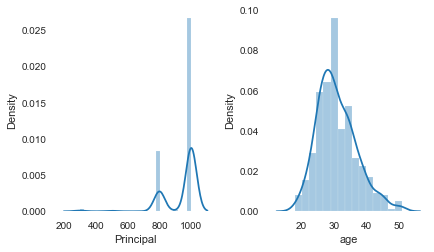

In [22]:
## Continious - distplot
plt.figure(figsize=(15,10))
n=0
for i in (lst_countinuos):
    n=n+1
    plt.subplot(3,5,n)
    sns.distplot(df[i])
plt.tight_layout()
plt.show()

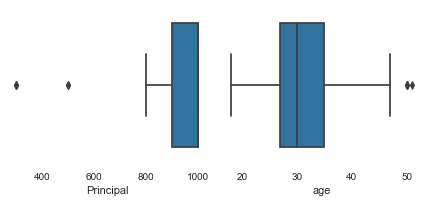

In [23]:
## Continious - boxplot
plt.figure(figsize=(15,8))
n=0
for i in (lst_countinuos):
    n=n+1
    plt.subplot(3,5,n)
    sns.boxplot(df[i])
plt.tight_layout()
plt.show()

In [ ]:
## Thấy phân giá trị outlier 2 biến liên tục vẫn xuất hiện phải chuẩn hóa dữ liệu hoặc tím cách xử lý outlier

In [24]:
## Category - describe
for i in lst_categorical:
    value_counts = df[i].value_counts()
    print('-', '\033[4m'+'Mô tả biến ', i+'\033[0m', ':',len(df[i].unique()),'giá trị')
    print(value_counts)

- Mô tả biến  loan_status : 2 giá trị
PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64
- Mô tả biến  terms : 3 giá trị
30    184
15    148
7      14
Name: terms, dtype: int64
- Mô tả biến  effective_date : 7 giá trị
9/11/2016    166
9/12/2016     87
9/10/2016     31
9/14/2016     31
9/13/2016     20
9/9/2016       8
9/8/2016       3
Name: effective_date, dtype: int64
- Mô tả biến  due_date : 23 giá trị
10/10/2016    90
9/25/2016     63
9/26/2016     42
10/11/2016    36
10/13/2016    19
10/9/2016     18
9/24/2016     12
9/27/2016     11
9/28/2016     10
10/12/2016     6
11/9/2016      6
10/8/2016      5
11/10/2016     4
10/25/2016     4
9/18/2016      3
9/16/2016      3
9/23/2016      3
9/19/2016      3
9/17/2016      2
11/12/2016     2
10/7/2016      2
9/22/2016      1
10/26/2016     1
Name: due_date, dtype: int64
- Mô tả biến  education : 4 giá trị
High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: e

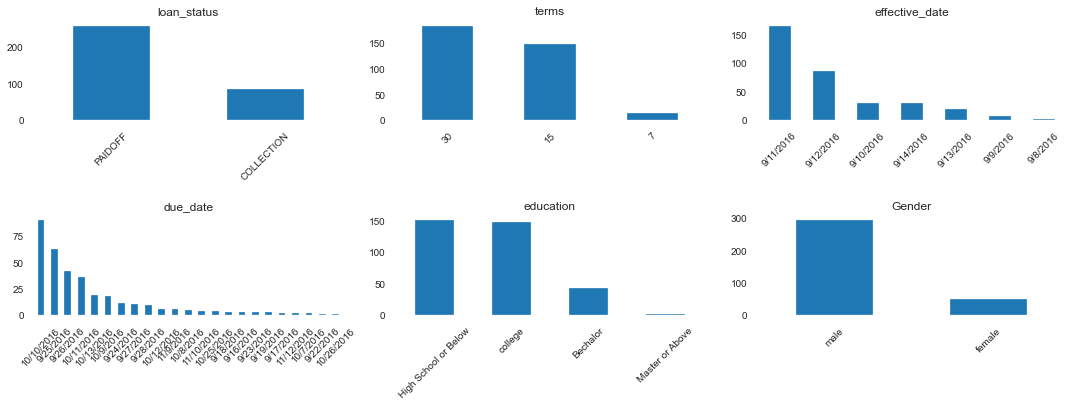

In [25]:
## Category - barplot
plt.figure(figsize=(15,10))
n=0
for i in lst_categorical:
    n=n+1
    plt.subplot(4,3,n)
    df[i].value_counts().plot.bar()
    plt.title(i)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

3. Bi-variate Analysis

In [26]:
## Continious & Continious - Correlation
##--> Đưa thêm một số thuộc tính phân loại kiểu số để quan sát
df[lst_countinuos].corr()

,Principal,age
Principal,1.000000,-0.060893
age,-0.060893,1.000000


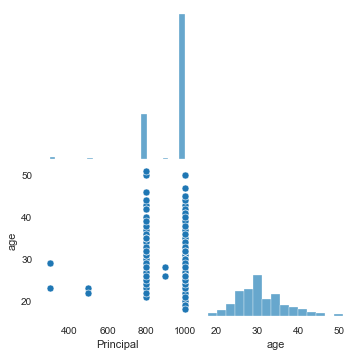

In [27]:
## Continious & Continious - Pairplot
sns.pairplot(df[lst_countinuos], corner = True)

In [28]:
## Continious & Category
prob = 0.95
alpha = 1.0 - prob
for j in lst_countinuos:
    string = []
    for i in lst_categorical:
        t = 'C(' + i + ')'
        string.append(t)
    string = j + ' ~ ' + '+'.join(string)
    string

    model = ols(string, data=df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    aov_table1 = aov_table[aov_table['PR(>F)'] < alpha]
    print('\033[4m'+'Các thuộc tính có ảnh hướng đáng kể dến thuộc tính', j+'\033[0m')
    print(aov_table1)
    print('\n')

Các thuộc tính có ảnh hướng đáng kể dến thuộc tính Principal
                         sum_sq    df         F        PR(>F)
C(effective_date)  3.579240e+05   6.0  7.591945  1.271171e-07
C(due_date)        1.514747e+06  22.0  8.762558  5.526140e-22


Các thuộc tính có ảnh hướng đáng kể dến thuộc tính age
                   sum_sq    df         F    PR(>F)
C(due_date)   2543.066080  22.0  3.369594  0.000001
C(education)   410.335185   3.0  3.987128  0.008258




In [29]:
## Categorical & Categorical
prob = 0.95
alpha = 1.0 - prob

pair1 = []
pair2 = []

for i in lst_categorical:
    for j in lst_categorical[lst_categorical.index(i)+1:]:
        crosstab = pd.crosstab(df[i], df[j])
        stat, p, dof, expected = chi2_contingency(crosstab)
#         critical = chi2.ppf(prob, dof)

        if p <= alpha:
            pair1.append([i,j])
        else:
            pair2.append([i,j])
    
print('- Phụ thuộc nhau (reject H0):',pair1)
print('\n')
print('- Độc lập nhau (fail to reject H0):',pair2)

- Phụ thuộc nhau (reject H0): [['loan_status', 'terms'], ['loan_status', 'effective_date'], ['loan_status', 'due_date'], ['terms', 'due_date'], ['effective_date', 'due_date']]


- Độc lập nhau (fail to reject H0): [['loan_status', 'education'], ['loan_status', 'Gender'], ['terms', 'effective_date'], ['terms', 'education'], ['terms', 'Gender'], ['effective_date', 'education'], ['effective_date', 'Gender'], ['due_date', 'education'], ['due_date', 'Gender'], ['education', 'Gender']]


In [30]:
# Handle the Missing Values

In [31]:
## see values
for i in df.columns:
    print('\033[4m'+'Kiểm tra biến', i +'\033[0m', ': ', len(df[i].unique()), 'giá trị,', 
          df[i].sort_values().unique(), ', dtype:', df[i].dtypes)

Kiểm tra biến loan_status :  2 giá trị, ['COLLECTION' 'PAIDOFF'] , dtype: object
Kiểm tra biến Principal :  5 giá trị, [ 300.  500.  800.  900. 1000.] , dtype: float64
Kiểm tra biến terms :  3 giá trị, [ 7 15 30] , dtype: int64
Kiểm tra biến effective_date :  7 giá trị, ['9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016' '9/14/2016' '9/8/2016'
 '9/9/2016'] , dtype: object
Kiểm tra biến due_date :  23 giá trị, ['10/10/2016' '10/11/2016' '10/12/2016' '10/13/2016' '10/25/2016'
 '10/26/2016' '10/7/2016' '10/8/2016' '10/9/2016' '11/10/2016'
 '11/12/2016' '11/9/2016' '9/16/2016' '9/17/2016' '9/18/2016' '9/19/2016'
 '9/22/2016' '9/23/2016' '9/24/2016' '9/25/2016' '9/26/2016' '9/27/2016'
 '9/28/2016'] , dtype: object
Kiểm tra biến age :  32 giá trị, [18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 50. 51.] , dtype: float64
Kiểm tra biến Gender :  2 giá trị, ['female' 'male'] , dtype: object
Kiểm tra biến education :  4 giá t

#### Nhận xét: Không có missing values

### 3. Handle Outlier Values

In [142]:
## Outlier với biến liên tục nằm dưới Q1 - 1.5*IQR
for i in lst_countinuos:
    Q1 = np.quantile(df[i], 0.25)
    IQR = stats.iqr(df[i])
    data_outlier_continuous = df[(df[i] < Q1 - 1.5*IQR)]
    print(i,'\n')
    print(data_outlier_continuous)

Principal 

    loan_status  Principal  terms effective_date   due_date   age  Gender  \
8       PAIDOFF      300.0      7     2016-09-10 2016-09-16  29.0       0   
128     PAIDOFF      500.0     15     2016-09-12 2016-09-26  23.0       1   
153     PAIDOFF      300.0      7     2016-09-12 2016-09-18  29.0       0   
176     PAIDOFF      300.0      7     2016-09-12 2016-09-18  23.0       0   
216     PAIDOFF      500.0      7     2016-09-13 2016-09-19  22.0       0   

                education  dayofweek  weekend  
8                 college          5        1  
128               college          0        0  
153  High School or Below          0        0  
176  High School or Below          0        0  
216  High School or Below          1        0  
age 

Empty DataFrame
Columns: [loan_status, Principal, terms, effective_date, due_date, age, Gender, education, dayofweek, weekend]
Index: []


In [33]:
## Outlier với biến liên tục nằm trên Q3 + 1.5*IQR
for i in lst_countinuos:
    Q3 = np.quantile(df[i], 0.75)
    IQR = stats.iqr(df[i])
    data_outlier_continuous1 = df[(df[i] > Q3 + 1.5*IQR)]
    print(i,'\n')
    print(data_outlier_continuous1)

Principal 

Empty DataFrame
Columns: [loan_status, Principal, terms, effective_date, due_date, age, Gender, education]
Index: []
age 

    loan_status  Principal  terms effective_date   due_date   age Gender  \
41      PAIDOFF      800.0     15      9/11/2016  9/25/2016  50.0   male   
184     PAIDOFF     1000.0     15      9/12/2016  9/26/2016  50.0   male   
223     PAIDOFF      800.0     15      9/13/2016  9/27/2016  51.0   male   
293  COLLECTION     1000.0     15      9/11/2016  9/25/2016  50.0   male   

                education  
41   High School or Below  
184  High School or Below  
223               college  
293       Master or Above  


#### Nhận xét: 
1. Đối với tuổi: 50, 51 là vẫn có thể vay vốn, nên các potential outliers này có thể giữ lại, tương ứng tỉ lệ
2. Đối với Principal: thì dưới 800 usd thì chỉ có 5 người tương ứng tỉ lệ 

### Convert 'due_date', 'effective_date' to date time object 

In [34]:
# code here
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

In [35]:
df.head(10)

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education
0,PAIDOFF,1000.0,30,2016-09-08,2016-10-07,45.0,male,High School or Below
1,PAIDOFF,1000.0,30,2016-09-08,2016-10-07,33.0,female,Bechalor
2,PAIDOFF,1000.0,15,2016-09-08,2016-09-22,27.0,male,college
3,PAIDOFF,1000.0,30,2016-09-09,2016-10-08,28.0,female,college
4,PAIDOFF,1000.0,30,2016-09-09,2016-10-08,29.0,male,college
5,PAIDOFF,1000.0,30,2016-09-09,2016-10-08,36.0,male,college
6,PAIDOFF,1000.0,30,2016-09-09,2016-10-08,28.0,male,college
7,PAIDOFF,800.0,15,2016-09-10,2016-09-24,26.0,male,college
8,PAIDOFF,300.0,7,2016-09-10,2016-09-16,29.0,male,college
9,PAIDOFF,1000.0,15,2016-09-10,2016-10-09,39.0,male,High School or Below


# Data visualization

How many sample of each class is in our data set?

In [36]:
# code
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

**260** people have paid off the loan on time while **86** have gone into collection 

Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

In [37]:
img1 = np.array(Image.open('data/Principal_Male_Female.jpg'))

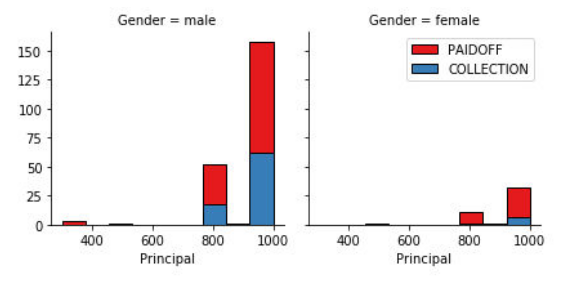

In [38]:
plt.figure(figsize=(10,5))
plt.imshow(img1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
img2 = np.array(Image.open('data/Age_Male_Female.jpg'))

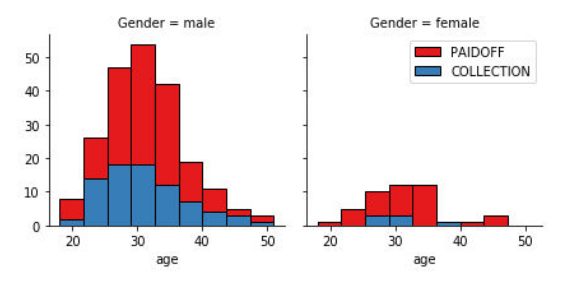

In [40]:
plt.figure(figsize=(10,5))
plt.imshow(img2, interpolation='bilinear')
plt.axis('off')
plt.show()

No handles with labels found to put in legend.


<Figure size 432x216 with 0 Axes>

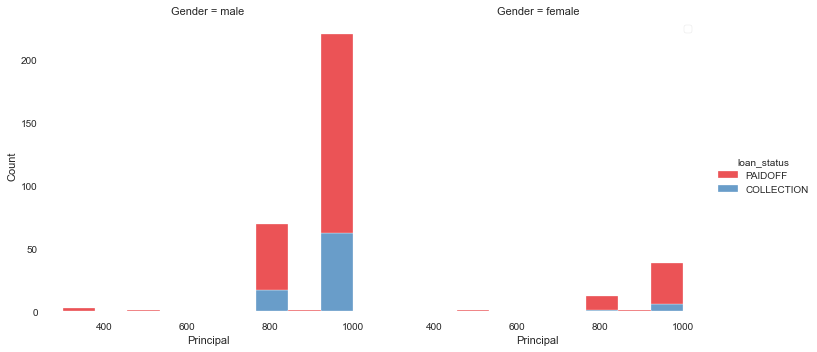

In [41]:
## 'loan_status' by 'Gender', 'Principle'
plt.figure(figsize=(6,3))
sns.set_palette(['#e51a1d','#377db8'])
sns.displot(data=df, x='Principal', col='Gender', hue='loan_status', multiple="stack", kind='hist', bins=9)
plt.xticks([400, 600, 800, 1000])
plt.legend()
plt.show()

No handles with labels found to put in legend.


<Figure size 432x216 with 0 Axes>

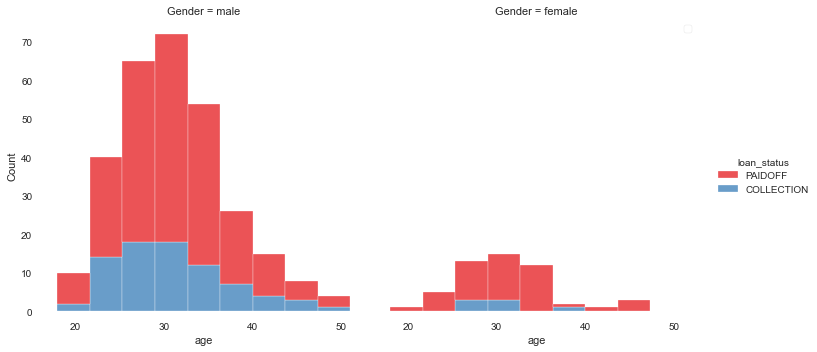

In [42]:
## 'loan_status' by 'Gender', 'age'
plt.figure(figsize=(6,3))
sns.set_palette(['#e51a1d','#377db8'])
sns.displot(data=df, x='age', col='Gender', hue='loan_status', multiple="stack", kind='hist', bins=9)
plt.xticks([20, 30, 40, 50])
plt.legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [43]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education,dayofweek
0,PAIDOFF,1000.0,30,2016-09-08,2016-10-07,45.0,male,High School or Below,3
1,PAIDOFF,1000.0,30,2016-09-08,2016-10-07,33.0,female,Bechalor,3
2,PAIDOFF,1000.0,15,2016-09-08,2016-09-22,27.0,male,college,3
3,PAIDOFF,1000.0,30,2016-09-09,2016-10-08,28.0,female,college,4
4,PAIDOFF,1000.0,30,2016-09-09,2016-10-08,29.0,male,college,4


Lets plot some columns to underestand data better:

In [44]:
img3 = np.array(Image.open('data/day_of_week.jpg'))

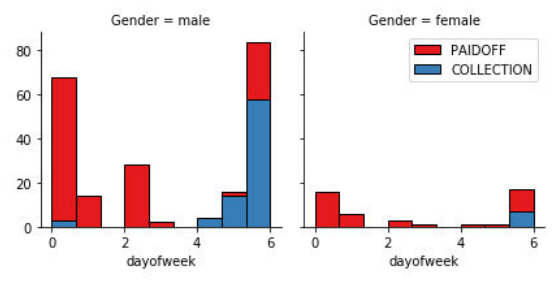

In [45]:
plt.figure(figsize=(10,5))
plt.imshow(img3, interpolation='bilinear')
plt.axis('off')
plt.show()

No handles with labels found to put in legend.


<Figure size 432x216 with 0 Axes>

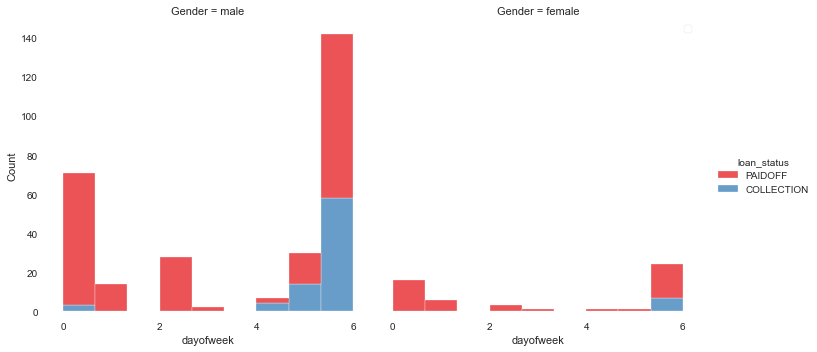

In [46]:
## 'loan_status' by 'Gender', 'dayofweek'
plt.figure(figsize=(6,3))
sns.set_palette(['#e51a1d','#377db8'])
sns.displot(data=df, x='dayofweek', col='Gender', hue='loan_status', multiple="stack", kind='hist', bins=9)
plt.xticks([0, 2, 4, 6])
plt.legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [47]:
df['weekend'] = 0
df.loc[df['dayofweek'] > 3, 'weekend'] = 1
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education,dayofweek,weekend
0,PAIDOFF,1000.0,30,2016-09-08,2016-10-07,45.0,male,High School or Below,3,0
1,PAIDOFF,1000.0,30,2016-09-08,2016-10-07,33.0,female,Bechalor,3,0
2,PAIDOFF,1000.0,15,2016-09-08,2016-09-22,27.0,male,college,3,0
3,PAIDOFF,1000.0,30,2016-09-09,2016-10-08,28.0,female,college,4,1
4,PAIDOFF,1000.0,30,2016-09-09,2016-10-08,29.0,male,college,4,1


## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [48]:
# code here
df_gr1 = pd.crosstab(df['Gender'], df['loan_status']).reset_index().rename_axis(None, axis=1)
df_gr1['COLLECTION_%'] = df_gr1['COLLECTION'] / df.shape[0]
df_gr1['PAIDOFF_%'] = df_gr1['PAIDOFF'] / df.shape[0]
df_gr1

,Gender,COLLECTION,PAIDOFF,COLLECTION_%,PAIDOFF_%
0,female,7,45,0.020231,0.130058
1,male,79,215,0.228324,0.621387


**13.00** % of female pay there loans while only **62.13** % of males pay there loan

Lets convert male to 0 and female to 1:

In [49]:
# code here
df.loc[df['Gender'] == 'female', 'Gender'] = 1
df.loc[df['Gender'] == 'male', 'Gender'] = 0
df['Gender'] = df['Gender'].astype(int)
df['Gender']

0      0
1      1
2      0
3      1
4      0
      ..
341    0
342    0
343    0
344    0
345    0
Name: Gender, Length: 346, dtype: int32

## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [50]:
# code here
df_gr1 = pd.crosstab(df['education'], df['loan_status']).reset_index().rename_axis(None, axis=1)
df_gr1['COLLECTION_%'] = df_gr1['COLLECTION'] / df.shape[0]
df_gr1['PAIDOFF_%'] = df_gr1['PAIDOFF'] / df.shape[0]
df_gr1

,education,COLLECTION,PAIDOFF,COLLECTION_%,PAIDOFF_%
0,Bechalor,11,33,0.031792,0.095376
1,High School or Below,39,112,0.112717,0.323699
2,Master or Above,1,1,0.002890,0.002890
3,college,35,114,0.101156,0.329480


#### Feature before One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [51]:
# code here
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000.0,30,45.0,0,High School or Below
1,1000.0,30,33.0,1,Bechalor
2,1000.0,15,27.0,0,college
3,1000.0,30,28.0,1,college
4,1000.0,30,29.0,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [52]:
# code here
df_fe = df[['Principal','terms','age','Gender','weekend', 'education']]
df_fe.head()

,Principal,terms,age,Gender,weekend,education
0,1000.0,30,45.0,0,0,High School or Below
1,1000.0,30,33.0,1,0,Bechalor
2,1000.0,15,27.0,0,0,college
3,1000.0,30,28.0,1,1,college
4,1000.0,30,29.0,0,1,college


In [53]:
encoder = OneHotEncoder()

In [54]:
lst_encode = ['education']

In [55]:
arr = encoder.fit_transform(df_fe[lst_encode]).toarray()
arr.shape

(346, 4)

In [56]:
cols = []
n = 0
for i in encoder.categories_:
    for j in i: 
        t = 'oh_' + lst_encode[n] + '_' +j
        t = t.replace('-', '_')
        cols.append(t)
    n = n+1

df_oh_encode = pd.DataFrame(arr, columns=cols)
df_oh_encode.head()

,oh_education_Bechalor,oh_education_High School or Below,oh_education_Master or Above,oh_education_college
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [57]:
df_oh_encode = df_oh_encode.drop(['oh_education_Master or Above'], axis=1)
df_oh_encode.head()

,oh_education_Bechalor,oh_education_High School or Below,oh_education_college
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [58]:
df_fe2 = pd.concat([df_fe, df_oh_encode], axis=1)
df_fe2.head()

,Principal,terms,age,Gender,weekend,education,oh_education_Bechalor,oh_education_High School or Below,oh_education_college
0,1000.0,30,45.0,0,0,High School or Below,0.0,1.0,0.0
1,1000.0,30,33.0,1,0,Bechalor,1.0,0.0,0.0
2,1000.0,15,27.0,0,0,college,0.0,0.0,1.0
3,1000.0,30,28.0,1,1,college,0.0,0.0,1.0
4,1000.0,30,29.0,0,1,college,0.0,0.0,1.0


### Feature selection

Lets defind feature sets, X:
- X is inputs, X = Features

In [59]:
# code here
df_fe2.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'education',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college'],
      dtype='object')

In [60]:
X = df_fe2[['Principal', 'terms', 'age', 'Gender', 'weekend', 
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college']]

In [61]:
X.head()

,Principal,terms,age,Gender,weekend,oh_education_Bechalor,oh_education_High School or Below,oh_education_college
0,1000.0,30,45.0,0,0,0.0,1.0,0.0
1,1000.0,30,33.0,1,0,1.0,0.0,0.0
2,1000.0,15,27.0,0,0,0.0,0.0,1.0
3,1000.0,30,28.0,1,1,0.0,0.0,1.0
4,1000.0,30,29.0,0,1,0.0,0.0,1.0


What are our lables?
- y is output, y = 'loan_status' column

In [62]:
# code here
y = df['loan_status']

In [63]:
y = y.replace('PAIDOFF', 1)
y = y.replace('COLLECTION', 0)

In [64]:
y

0      1
1      1
2      1
3      1
4      1
      ..
341    0
342    0
343    0
344    0
345    0
Name: loan_status, Length: 346, dtype: int64

## Scaler Data 

Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

In [65]:
# code here
X.describe()

,Principal,terms,age,Gender,weekend,oh_education_Bechalor,oh_education_High School or Below,oh_education_college
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306,0.150289,0.592486,0.127168,0.436416,0.430636
std,109.425530,7.991006,6.039418,0.357872,0.492084,0.333643,0.496659,0.495882
min,300.000000,7.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,15.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,30.000000,30.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1000.000000,30.000000,35.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1000.000000,30.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
## Log Normalization
lst_log = ['Principal', 'terms', 'age']

for i in lst_log:
    name_log = i + '_log'
    X[name_log] = np.log(X[i])   

In [67]:
X.head()

,Principal,terms,age,Gender,weekend,oh_education_Bechalor,oh_education_High School or Below,oh_education_college,Principal_log,terms_log,age_log
0,1000.0,30,45.0,0,0,0.0,1.0,0.0,6.907755,3.401197,3.806662
1,1000.0,30,33.0,1,0,1.0,0.0,0.0,6.907755,3.401197,3.496508
2,1000.0,15,27.0,0,0,0.0,0.0,1.0,6.907755,2.708050,3.295837
3,1000.0,30,28.0,1,1,0.0,0.0,1.0,6.907755,3.401197,3.332205
4,1000.0,30,29.0,0,1,0.0,0.0,1.0,6.907755,3.401197,3.367296


In [68]:
# Split data

In [69]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, random_state=0,
                                                   test_size=0.2)

In [70]:
X.shape, X_tr.shape, X_ts.shape

((346, 11), (276, 11), (70, 11))

In [71]:
y.count(), y_tr.count(), y_ts.count()

(346, 276, 70)

In [72]:
# create X_train, y_train

In [73]:
X.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 'Principal_log', 'terms_log', 'age_log'],
      dtype='object')

In [74]:
# Toàn bộ thuộc tính x
X_train1 = X[['Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 'Principal_log', 'terms_log', 'age_log']]
# Loại thuộc tính 
X_train2 = X[['terms', 'age', 'Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 'Principal_log']]
X_train3 = X_tr[['Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 'Principal_log', 'terms_log', 'age_log']]
X_ts3 = X_ts[['Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 'Principal_log', 'terms_log', 'age_log']]

In [75]:
y_train1 = y
y_train2 = y
y_train3 = y_tr
y_ts3 = y_ts

In [76]:
# Over sampling - X_train1_rs1, y_train1_rs1
sm1 = SMOTE(random_state=0)
X_train1_rs1, y_train1_rs1 = sm1.fit_resample(X_train1, y_train1)
y_train1_rs1.value_counts()

0    260
1    260
Name: loan_status, dtype: int64

In [77]:
# Combine Over sampling, Under sampling - X_train1_rs2, y_train1_rs2
df3 = pd.concat([X, pd.DataFrame(y)], axis=1)
df_0 = df3[df3['loan_status']==0]
df_1 = df3[df3['loan_status']==1]
df_1_resample = resample(df_1, replace=False, n_samples=150,
                        random_state=0)
df3=pd.concat([df_1_resample, df_0])

In [78]:
sm2 = SMOTE(random_state=0)

In [79]:
X_bf = df3[['Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 'Principal_log', 'terms_log', 'age_log']]
y_bf = df3['loan_status']
X_train1_rs2, y_train1_rs2 = sm2.fit_resample(X_bf, y_bf)
y_train1_rs2.value_counts()

0    150
1    150
Name: loan_status, dtype: int64

In [80]:
# RobustScaler - X_train4, y_train4
lst_before_scale = ['Principal', 'terms', 'age'] #-> scale on original variables
lst_after_scale = ['sc_Principal', 'sc_terms', 'sc_age']
X_before_scale = X[lst_before_scale]
scaler = RobustScaler()
X_scale = scaler.fit_transform(X_before_scale)
X_scale = pd.DataFrame(X_scale, columns=X_before_scale.columns)
X_scale.columns = lst_after_scale
X_scale.head()

,sc_Principal,sc_terms,sc_age
0,0.0,0.0,1.875
1,0.0,0.0,0.375
2,0.0,-1.0,-0.375
3,0.0,0.0,-0.250
4,0.0,0.0,-0.125


In [81]:
X2 = pd.concat([X, X_scale], axis=1)
X2.head()

,Principal,terms,age,Gender,weekend,oh_education_Bechalor,oh_education_High School or Below,oh_education_college,Principal_log,terms_log,age_log,sc_Principal,sc_terms,sc_age
0,1000.0,30,45.0,0,0,0.0,1.0,0.0,6.907755,3.401197,3.806662,0.0,0.0,1.875
1,1000.0,30,33.0,1,0,1.0,0.0,0.0,6.907755,3.401197,3.496508,0.0,0.0,0.375
2,1000.0,15,27.0,0,0,0.0,0.0,1.0,6.907755,2.708050,3.295837,0.0,-1.0,-0.375
3,1000.0,30,28.0,1,1,0.0,0.0,1.0,6.907755,3.401197,3.332205,0.0,0.0,-0.250
4,1000.0,30,29.0,0,1,0.0,0.0,1.0,6.907755,3.401197,3.367296,0.0,0.0,-0.125


In [82]:
X_train4 = X2[['Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 
       'sc_Principal', 'sc_terms', 'sc_age']]
y_train4 = y

Nhận xét: Sẽ có 6 mô hình để huấn luyện

# Classification 

Now, use the training set to build an accurate model. Then use the test set (loan_test.csv) to report the accuracy of the model
You should use the following algorithm:
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Logistic Regression

In [83]:
# Model1

In [84]:
model1 = LogisticRegression()

In [85]:
model1.fit(X_train1, y_train1)

LogisticRegression()

In [86]:
yhat_train1 = model1.predict_proba(X_train1)

In [87]:
acs_train1 = model1.score(X_train1, y_train1)
acs_train1

0.7485549132947977

In [88]:
model1_rs1 = LogisticRegression()
model1_rs1.fit(X_train1_rs1, y_train1_rs1)
yhat_train1_rs1 = model1_rs1.predict_proba(X_train1_rs1)
acs_train1_rs1 = model1_rs1.score(X_train1_rs1, y_train1_rs1)
acs_train1_rs1

0.7634615384615384

In [89]:
# Model1_resample1

In [90]:
model1_rs1 = LogisticRegression()
model1_rs1.fit(X_train1_rs1, y_train1_rs1)
yhat_train1_rs1 = model1_rs1.predict_proba(X_train1_rs1)
acs_train1_rs1 = model1_rs1.score(X_train1_rs1, y_train1_rs1)
acs_train1_rs1

0.7634615384615384

In [91]:
# Model1_resample2

In [92]:
model1_rs2 = LogisticRegression()
model1_rs2.fit(X_train1_rs2, y_train1_rs2)
yhat_train1_rs2 = model1_rs2.predict_proba(X_train1_rs2)
acs_train1_rs2 = model1_rs2.score(X_train1_rs2, y_train1_rs2)
acs_train1_rs2

0.7566666666666667

In [93]:
# Model2

In [94]:
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)
yhat_train2 = model2.predict_proba(X_train2)
acs_train2 = model2.score(X_train2, y_train2)
acs_train2

0.7398843930635838

In [95]:
# Model3

In [96]:
model3 = LogisticRegression()
model3.fit(X_train3, y_train3)
yhat_train3 = model3.predict_proba(X_train3)
acs_train3 = model3.score(X_train3, y_train3)
acs_train3

0.7318840579710145

In [97]:
# Model4

In [98]:
model4 = LogisticRegression()
model4.fit(X_train4, y_train4)
yhat_train4 = model4.predict_proba(X_train4)
acs_train4 = model3.score(X_train4, y_train4)
acs_train4

0.7514450867052023

# Model Evaluation using Test set

In [99]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# and the others libraries...

### Load Test set for evaluation 

In [100]:
# Read CSV file: loan_test.csv
# Chú ý: train data có cấu trúc thế nào thì phải chuẩn test data có cấu trúc thế đó!!!
# code here
df_test = pd.read_csv('data/loan_test.csv')
df_test = df_test[['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
         'age', 'Gender', 'education']]
df_test.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,female,Bechalor
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,male,Master or Above
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,female,High School or Below
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,male,college
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,male,Bechalor


In [101]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     54 non-null     object
 1   Principal       54 non-null     int64 
 2   terms           54 non-null     int64 
 3   effective_date  54 non-null     object
 4   due_date        54 non-null     object
 5   age             54 non-null     int64 
 6   Gender          54 non-null     object
 7   education       54 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.5+ KB


In [102]:
df_test.loc[df_test['Gender'] == 'female', 'Gender'] = 1
df_test.loc[df_test['Gender'] == 'male', 'Gender'] = 0
df_test['Gender'] = df_test['Gender'].astype(int)

In [103]:
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])
df_test['dayofweek'] = df_test['effective_date'].dt.dayofweek
df_test['weekend'] = 0
df_test.loc[df_test['dayofweek'] > 3, 'weekend'] = 1

In [104]:
encoder = OneHotEncoder()
lst_encode = ['education']
arr = encoder.fit_transform(df_test[lst_encode]).toarray()

cols = []
n = 0
for i in encoder.categories_:
    for j in i: 
        t = 'oh_' + lst_encode[n] + '_' +j
        t = t.replace('-', '_')
        cols.append(t)
    n = n+1
    
df_test_oh_encode = pd.DataFrame(arr, columns=cols)
df_test_oh_encode = df_test_oh_encode.drop(['oh_education_Master or Above'], axis=1)
df_test2 = pd.concat([df_test, df_test_oh_encode], axis=1)

In [105]:
df_test2.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education,dayofweek,weekend,oh_education_Bechalor,oh_education_High School or Below,oh_education_college
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,1,Bechalor,3,0,1.0,0.0,0.0
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,0,Master or Above,4,1,0.0,0.0,0.0
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,1,High School or Below,5,1,0.0,1.0,0.0
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,0,college,5,1,0.0,0.0,1.0
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,0,Bechalor,6,1,1.0,0.0,0.0


In [106]:
## Log Normalization
lst_log = ['Principal', 'terms', 'age']
for i in lst_log:
    name_log = i + '_log'
    df_test2[name_log] = np.log(df_test2[i])    
df_test2.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education,dayofweek,weekend,oh_education_Bechalor,oh_education_High School or Below,oh_education_college,Principal_log,terms_log,age_log
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,1,Bechalor,3,0,1.0,0.0,0.0,6.907755,3.401197,3.912023
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,0,Master or Above,4,1,0.0,0.0,0.0,5.703782,1.945910,3.555348
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,1,High School or Below,5,1,0.0,1.0,0.0,6.907755,3.401197,3.761200
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,0,college,5,1,0.0,0.0,1.0,6.907755,3.401197,3.258097
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,0,Bechalor,6,1,1.0,0.0,0.0,6.684612,2.708050,3.367296


In [107]:
# RobustScaler
lst_before_scale = ['Principal', 'terms', 'age'] #--> scale on original variable
lst_after_scale = ['sc_Principal', 'sc_terms', 'sc_age']
df_test2_before_scale = df_test2[lst_before_scale]
# scaler = RobustScaler()
df_test2_scale = scaler.transform(df_test2_before_scale)
df_test2_scale = pd.DataFrame(df_test2_scale, columns=df_test2_before_scale.columns)
df_test2_scale.columns = lst_after_scale
df_test2_scale.head()

,sc_Principal,sc_terms,sc_age
0,0.0,0.000000,2.500
1,-7.0,-1.533333,0.625
2,0.0,0.000000,1.625
3,0.0,0.000000,-0.500
4,-2.0,-1.000000,-0.125


In [108]:
y_test = df_test2['loan_status']
y_test = y_test.replace('PAIDOFF', 1)
y_test = y_test.replace('COLLECTION', 0)

In [109]:
df_test3 = pd.concat([df_test2, df_test2_scale], axis=1)
df_test3.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education,dayofweek,weekend,oh_education_Bechalor,oh_education_High School or Below,oh_education_college,Principal_log,terms_log,age_log,sc_Principal,sc_terms,sc_age
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,1,Bechalor,3,0,1.0,0.0,0.0,6.907755,3.401197,3.912023,0.0,0.000000,2.500
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,0,Master or Above,4,1,0.0,0.0,0.0,5.703782,1.945910,3.555348,-7.0,-1.533333,0.625
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,1,High School or Below,5,1,0.0,1.0,0.0,6.907755,3.401197,3.761200,0.0,0.000000,1.625
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,0,college,5,1,0.0,0.0,1.0,6.907755,3.401197,3.258097,0.0,0.000000,-0.500
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,0,Bechalor,6,1,1.0,0.0,0.0,6.684612,2.708050,3.367296,-2.0,-1.000000,-0.125


In [110]:
X_test1 = df_test2[['Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 'Principal_log', 'terms_log', 'age_log']]
X_test2 = df_test2[['terms', 'age', 'Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 'Principal_log']]
X_test3 = df_test2[['Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 'Principal_log', 'terms_log', 'age_log']]
X_test4 = df_test3[['Gender', 'weekend',
       'oh_education_Bechalor', 'oh_education_High School or Below',
       'oh_education_college', 
       'sc_Principal', 'sc_terms', 'sc_age']]

In [111]:
y_test1 = y_test
y_test2 = y_test
y_test3 = y_test
y_test4 = y_test

In [112]:
# Model Evaluation

In [113]:
# Model Evaluation - Model1

In [114]:
yhat_test1 = model1.predict(X_test1)

In [115]:
acs_test1 = model1.score(X_test1, y_test1)
acs_test1 

0.7592592592592593

In [116]:
cm1 = confusion_matrix(y_true=y_test1, y_pred=yhat_test1)
cm1

array([[ 1, 13],
       [ 0, 40]], dtype=int64)

In [117]:
f1_score(y_test1, yhat_test1)

0.8602150537634409

In [118]:
# Model Evaluation - Model1_resample1

In [119]:
yhat_test1_rs1 = model1_rs1.predict(X_test1)
acs_test1_rs1 = model1_rs1.score(X_test1, y_test1)
acs_test1_rs1 

0.6666666666666666

In [120]:
cm1_rs1 = confusion_matrix(y_true=y_test1, y_pred=yhat_test1_rs1)
cm1_rs1

array([[10,  4],
       [14, 26]], dtype=int64)

In [121]:
f1_score(y_test1, yhat_test1_rs1)

0.7428571428571429

In [122]:
# Model Evaluation - Model1_resample2

In [123]:
yhat_test1_rs2 = model1_rs2.predict(X_test1)
acs_test1_rs2 = model1_rs2.score(X_test1, y_test1)
acs_test1_rs2 

0.7037037037037037

In [124]:
cm1_rs2 = confusion_matrix(y_true=y_test1, y_pred=yhat_test1_rs2)
cm1_rs2

array([[11,  3],
       [13, 27]], dtype=int64)

In [125]:
f1_score(y_test1, yhat_test1_rs2)

0.7714285714285714

In [126]:
# Model Evaluation - Model2

In [127]:
yhat_test2 = model2.predict(X_test2)
acs_test2 = model2.score(X_test2, y_test2)
acs_test2

0.7592592592592593

In [128]:
cm2 = confusion_matrix(y_true=y_test2, y_pred=yhat_test2)
cm2

array([[ 1, 13],
       [ 0, 40]], dtype=int64)

In [129]:
f1_score(y_test2, yhat_test2)

0.8602150537634409

In [130]:
# Model Evaluation - Model3

In [131]:
yhat_ts3 = model3.predict(X_ts3)
acs_ts3 = model3.score(X_ts3, y_ts3)
acs_ts3

0.8285714285714286

In [132]:
cm3_ts = confusion_matrix(y_true=y_ts3, y_pred=yhat_ts3)
cm3_ts

array([[ 0, 12],
       [ 0, 58]], dtype=int64)

In [133]:
f1_score(y_ts3, yhat_ts3)

0.90625

In [134]:
yhat_test3 = model3.predict(X_test3)
acs_test3 = model3.score(X_test3, y_test3)
acs_test3

0.7407407407407407

In [135]:
cm3 = confusion_matrix(y_true=y_test3, y_pred=yhat_test3)
cm3

array([[ 0, 14],
       [ 0, 40]], dtype=int64)

In [136]:
f1_score(y_test3, yhat_test3)

0.851063829787234

In [137]:
# Model Evaluation - Model4

In [138]:
yhat_test4 = model4.predict(X_test4)
acs_test4 = model4.score(X_test4, y_test4)
acs_test4

0.7592592592592593

In [139]:
cm4 = confusion_matrix(y_true=y_test4, y_pred=yhat_test4)
cm4

array([[ 1, 13],
       [ 0, 40]], dtype=int64)

In [140]:
f1_score(y_test4, yhat_test4)

0.8602150537634409

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Accuracy Score | 
|--------------------|---------|
| LogisticRegression | ?       | 

In [141]:
pd.DataFrame({'Algorithm':['LogisticRegression - Model 1', 
                           'LogisticRegression - Model 1 - resample 1',
                           'LogisticRegression - Model 1 - resample 2',
                           'LogisticRegression - Model 2', 
                           'LogisticRegression - Model 3',
                           'LogisticRegression - Model 4'
                          ],
              'Accuracy Score - Test': [acs_test1, acs_test1_rs1, acs_test1_rs2, acs_test2, acs_test3, acs_test4],   
              'Accuracy Score - Train': [acs_train1, acs_train1_rs1, acs_train1_rs2, acs_train2, acs_train3, acs_train4] 
})

,Algorithm,Accuracy Score - Test,Accuracy Score - Train
0,LogisticRegression - Model 1,0.759259,0.748555
1,LogisticRegression - Model 1 - resample 1,0.666667,0.763462
2,LogisticRegression - Model 1 - resample 2,0.703704,0.756667
3,LogisticRegression - Model 2,0.759259,0.739884
4,LogisticRegression - Model 3,0.740741,0.731884
5,LogisticRegression - Model 4,0.759259,0.751445


Nhận xét: Model 1, 2, 4 là các model có hiệu suất cao hơn

<h3>Thanks for completing this project!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
<hr>
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>